In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
## loading the data set
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [42]:
##preparing the training and testing data sets
y = df[['mpg']].values
x = df[['displacement']].values
df_arguement = np.argsort(y[:,0])
position_training = [i for i in df_arguement if (i%2==0)]
position_testing = [i for i in df_arguement if (i%2!=0)]

y_test = y[position_testing]
x_test = x[position_testing]

y_train = y[position_training]
x_train = x[position_training]

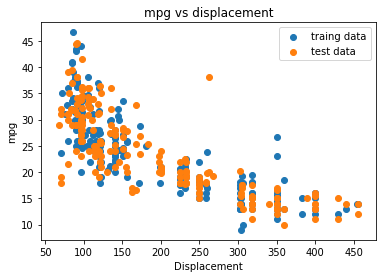

In [46]:
## visualising the data
plt.scatter(x_train,y_train,label='traing data')
plt.scatter(x_test,y_test,label='test data')
plt.legend()
plt.xlabel('Displacement')
plt.ylabel('mpg')
plt.title('mpg vs displacement')
plt.show;

In [48]:
##normalise features
def normalise_parameters(x):
    return (np.std(x,axis=0),np.mean(x,axis=0))

def normalise_feature(x,mean,std):
    return (x-mean)/std


std,mean = normalise_parameters(x_train)
x_train_normalised = normalise_feature(x_train,mean,std)
x_test_normalised = normalise_feature(x_test,mean,std)

In [51]:
##creating the augmented feature
x_traing_augmented = np.hstack((np.ones((x_train_normalised.shape[0],1)),x_train_normalised))
x_test_augmented = np.hstack((np.ones((x_test_normalised.shape[0],1)),x_test_normalised))

In [52]:
## defining the linear regression algorithm
def linear_regression(theta,x):
    y = np.dot(x,theta)
    return y

In [62]:
## gradient descent
def gradient_descent(x,y,theta,f,alpha,iteration_max):
    t = 1
    while t<iteration_max:
        error = f(theta,x) - y
        error_x = error*x
        theta= theta -alpha*np.mean(error_x,axis=0)[:,np.newaxis]
        t = t+1
    return theta

##getting the theta
initial_theta = np.zeros((x_traing_augmented.shape[1],1))
theta = gradient_descent(x=x_traing_augmented,y=y_train,theta=initial_theta,f=linear_regression,iteration_max=1000,alpha=0.1)

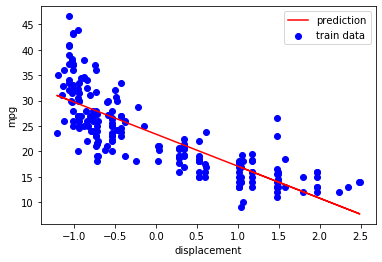

In [87]:
##finding predictions of the traing data
prediction = linear_regression(theta,x_traing_augmented)
plt.scatter(x_traing_augmented[:,1], y_train[:,0], label='train data', c='blue')
plt.plot(x_traing_augmented[:,1], prediction[:,0], label='prediction', c='red')
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.legend();

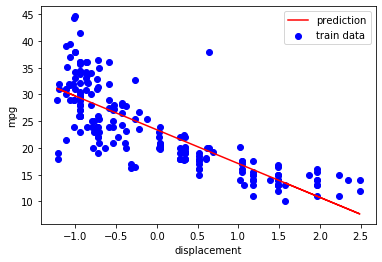

In [89]:
##predictions of the testing data
prediction = linear_regression(theta,x_test_augmented)
plt.scatter(x_test_augmented[:,1], y_test[:,0], label='train data', c='blue')
plt.plot(x_test_augmented[:,1], prediction[:,0], label='prediction', c='red')
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.legend();

1.0